In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    a = tx.T.dot(tx)
    b = tx.T.dot(y)
    return np.linalg.solve(a, b)

def calculate_rmse(y, tx, w):
    e = y - tx @ w
    return np.sqrt((np.transpose(e) @ e) / len(y))

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
from grid_search import *
from gradient_descent import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # least square or grid search: TODO
    # this code should compare the optimal weights obtained 
    # by least squares vs. grid search
    # ***************************************************
    gd_losses, gd_ws = gradient_descent(y, tx, np.array([0, 0]), max_iters=50, gamma=1)
    gs_losses = grid_search(y, tx, np.arange(50, 100, 0.5), np.arange(0, 20, 0.5));
    least_squares(y, tx)
    
    return 

Test it here

In [4]:
test_your_least_squares()

[gradient descent] (0/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434988977
[gradient descent] (1/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
[gradient descent] (2/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
[gradient descent] (3/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
[gradient descent] (4/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
[gradient descent] (5/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
[gradient descent] (6/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
[gradient descent] (7/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
[gradient descent] (8/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
[gradient descent] (9/49): loss=30.7717757376588, w0=73.29392200210519, w1=13.479712434989048
[gradient descent] (10/49): loss=30.7717757376588, w0=73.293

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))
x

shape of x (50,)
shape of y (50,)


array([0.35237491, 4.8951233 , 1.86662437, 3.50706129, 3.38087384,
       0.73093728, 3.88562366, 5.65224803, 6.28318531, 2.37137419,
       0.60474982, 3.63324875, 0.85712473, 2.49756165, 1.61424946,
       5.39987312, 6.15699785, 6.0308104 , 0.47856237, 2.87612401,
       4.51656093, 0.98331219, 1.10949964, 0.1       , 2.11899928,
       1.36187455, 4.01181111, 5.77843549, 4.26418602, 1.2356871 ,
       2.24518674, 1.99281183, 1.48806201, 4.64274839, 4.39037348,
       3.00231147, 0.22618746, 5.27368567, 5.02131076, 5.52606058,
       2.6237491 , 4.76893584, 3.12849893, 1.74043692, 3.7594362 ,
       3.25468638, 5.90462294, 4.13799857, 2.74993656, 5.14749821])

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [6]:
from plots import *
print(x[1:5])
print(build_poly([1,2], 3))


[4.8951233  1.86662437 3.50706129 3.38087384]
[[1 1 1 1]
 [1 2 4 8]]


In [30]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # form the data to do polynomial regression.: TODO
        # ***************************************************
        poly_data = build_poly(x, degree)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # least square and calculate RMSE: TODO
        # ***************************************************
        weights = least_squares(y, poly_data)
        rmse = calculate_rmse(y, poly_data, weights)
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
        
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907327
Processing 4th experiment, degree=12, rmse=0.24328247483727994


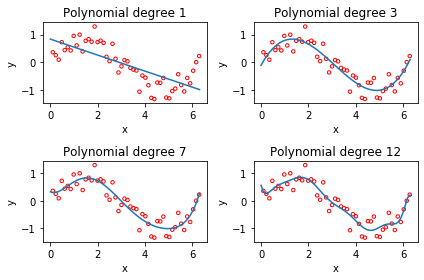

In [31]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [32]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    # ***************************************************
    # INSERT YOUR CODE HERE
    # split the data based on the given ratio: TODO
    # ***************************************************
    assert(x.shape[0] == y.shape[0])
    rindex = np.random.permutation(range(x.shape[0]))
    cutoff = int(len(rindex) * ratio)
    return (x.take(rindex)[0:cutoff], x.take(rindex)[cutoff:], 
            y.take(rindex)[0:cutoff], y.take(rindex)[cutoff:])

x_tr, x_te, y_tr, y_te = split_data(x, y, 0.1, 1)

Then, test your `split_data` function below.

In [33]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # Splitting the data into training and test sets
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)

    # Feature expansion for training and test sets of input dat
    x_tr, x_te = [build_poly(x_tr, degree), build_poly(x_te, degree)]
                              

    # Calculating the optioal weights for the training data
    w_tr = least_squares(y_tr, x_tr)
    
    # Calculating loss (rmse) for training and test data with training weights
    rmse_tr = calculate_rmse(y_tr, x_tr, w_tr)
    rmse_te = calculate_rmse(y_te, x_te, w_tr)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [34]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.250
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.548
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.259
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=4.637


# 3 Ridge Regression
Please fill in the function below.

In [12]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # ridge regression: TODO
    # ***************************************************
    a  = tx.T @ tx
    aI = 2 * len(y) * lambda_ * np.identity(tx.shape[1])
    b  = tx.T @ y
    return np.linalg.solve(a + aI, b)

In [18]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-4, 0, 15)
    
    # Splitting the data into training and test sets
    x_tr, x_te, y_tr, y_te = split_data(x, y, ratio, seed)
    
    # Feature expansion for training and test sets of input dat
    x_tr, x_te = [build_poly(x_tr, degree), build_poly(x_te, degree)]

    rmse_tr = []
    rmse_te = []
    
    for ind, lambda_ in enumerate(lambdas):
        # Calculating the optioal weights for the training data for ridge regression
        w_tr = ridge_regression(y_tr, x_tr, lambda_)

        # Calculating loss (rmse) for training and test data with training weights
        rmse_tr.append(calculate_rmse(y_tr, x_tr, w_tr))
        rmse_te.append(calculate_rmse(y_te, x_te, w_tr))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, Training RMSE=0.227, Testing RMSE=0.339
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.322
proportion=0.5, degree=7, lambda=0.005, Training RMSE=0.231, Testing RMSE=0.310
proportion=0.5, degree=7, lambda=0.010, Training RMSE=0.234, Testing RMSE=0.294
proportion=0.5, degree=7, lambda=0.019, Training RMSE=0.238, Testing RMSE=0.280
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.072, Training RMSE=0.260, Testing RMSE=0.291
proportion=0.5, degree=7, lambda=0.139, Training RMSE=

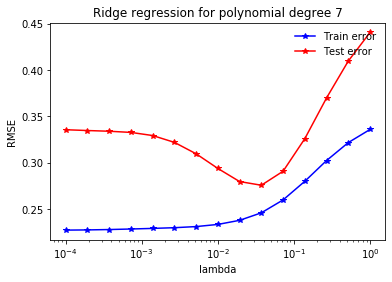

In [28]:
seed = 56
degree = 7
split_ratio = 0.5
train_test_split_demo(x, y, degree, split_ratio, seed)
ridge_regression_demo(x, y, degree, split_ratio, seed)